In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
%matplotlib inline


In [2]:

data1 = pd.read_csv('reprocessed.hungarian.data',sep=' ')
data1 = np.array(data1.dropna())
print(data1)
X = np.array(data1[:,:11])
Y = np.array(data1[:,12])

[[49.  0.  3. ... -9. -9.  1.]
 [37.  1.  2. ... -9. -9.  0.]
 [48.  0.  4. ... -9. -9.  3.]
 ...
 [48.  1.  3. ... -9.  6.  0.]
 [47.  0.  2. ... -9. -9.  0.]
 [53.  1.  4. ... -9. -9.  0.]]


In [4]:
eBAG = []
eOOBBag = []

n_boot = 300
for i in range(n_boot):
    bstrRegr = BaggingRegressor(DecisionTreeRegressor())
    bOOBRegr = BaggingRegressor(DecisionTreeRegressor(),oob_score=True)
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    bstrRegr.fit(X_train, Y_train)
    camaleon = bstrRegr.predict(X_validation)
    eBAG.append(mean_squared_error(Y_validation, camaleon))
    bOOBRegr.fit(X_train, Y_train)
    camaleon1 = bOOBRegr.predict(X_validation)
    eOOBBag.append(mean_squared_error(Y_validation, camaleon1))
    

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:1004: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:1004: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:1004: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:1004: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do

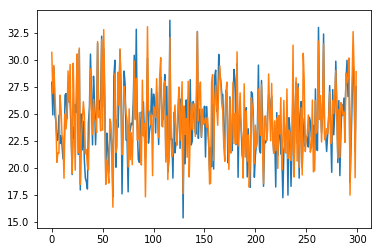

In [6]:
x=np.arange(n_boot)
plt.plot(x, eBAG)
plt.plot(x,eOOBBag)